In [274]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import altair as alt
from vega_datasets import data

### Preprocessing

#### character_list5

In [275]:
char_list = pd.read_csv('character_list5.csv', encoding='latin1')
char_list.shape

(23048, 5)

In [276]:
char_list.isna().sum()

script_id                 0
imdb_character_name       2
words                     0
gender                    0
age                    4785
dtype: int64

In [277]:
char_list = char_list.dropna()
char_list.shape

(18263, 5)

In [278]:
char_list.dtypes

script_id                int64
imdb_character_name     object
words                    int64
gender                  object
age                    float64
dtype: object

In [279]:
np.sort(char_list['imdb_character_name'].unique())

array(["'baby' brent", "'badge of honor", "'bagheera' the ", ..., 'álex',
       'éponine', 'étienne'], dtype=object)

In [280]:
np.sort(char_list['gender'].unique())

array(['?', 'f', 'm'], dtype=object)

In [281]:
# only keep and f and m genders
char_list = char_list[char_list['gender'] != '?']
char_list.shape

(18261, 5)

#### character_mapping

In [282]:
char_mapping = pd.read_csv('character_mapping.csv', encoding='latin1')
char_mapping.shape

(99390, 5)

In [283]:
char_mapping.isna().sum()

script_id                                  0
imdb_id                                    0
character_from_script                     53
closest_character_name_from_imdb_match    64
closest_imdb_character_id                  0
dtype: int64

In [284]:
char_mapping = char_mapping.dropna()
char_mapping.shape

(99275, 5)

In [285]:
char_mapping.dtypes

script_id                                  int64
imdb_id                                   object
character_from_script                     object
closest_character_name_from_imdb_match    object
closest_imdb_character_id                 object
dtype: object

In [286]:
np.sort(char_mapping['imdb_id'].unique())

array(['tt0019777', 'tt0021884', 'tt0022054', ..., 'tt3850214',
       'tt3859076', 'tt4270516'], dtype=object)

In [287]:
np.sort(char_mapping['character_from_script'].unique())

array(['a', 'a black ralegal anthea burton leads a young black law',
       'a card white o black screen reads', ..., 'zwaiter', 'zydowski',
       'zzi'], dtype=object)

In [288]:
np.sort(char_mapping['closest_character_name_from_imdb_match'].unique())

array(['#1', "'american gothic' woman", "'baby' brent", ..., 'álex',
       'éponine', 'étienne'], dtype=object)

In [289]:
np.sort(char_mapping['closest_imdb_character_id'].unique())

array(['nm0000001', 'nm0000002', 'nm0000004', ..., 'nm7823159',
       'nm7830294', 'nm7870244'], dtype=object)

#### meta_data7

In [290]:
meta = pd.read_csv('meta_data7.csv', encoding='latin1')
meta.shape

(2000, 6)

In [291]:
meta.isna().sum()

script_id       0
imdb_id         0
title           0
year            0
gross         338
lines_data      0
dtype: int64

In [292]:
meta = meta.dropna()
meta.shape

(1662, 6)

In [293]:
meta.dtypes

script_id       int64
imdb_id        object
title          object
year            int64
gross         float64
lines_data     object
dtype: object

In [294]:
np.sort(meta['imdb_id'].unique())

array(['tt0021884', 'tt0031725', 'tt0032138', ..., 'tt3850214',
       'tt3859076', 'tt4270516'], dtype=object)

In [295]:
np.sort(meta['title'].unique())

array(['(500) Days of Summer', '10 Things I Hate About You',
       '12 Years a Slave', ..., 'Zodiac', 'eXistenZ', 'xXx'], dtype=object)

In [296]:
np.sort(meta['lines_data'].unique())

array(['00000000000000000000044332410000000000000000000000000000000014334343344244323252002202000000000000030000000000000000041000000',
       '00000000000010000110000000100000000230000000000000000000000110000000',
       '00000000000110030000112000000000000000000000131433230000000004675475000000000000000000000133444320265434200000000023232421023434032',
       ...,
       '777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777774',
       '777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777774',
       '7777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777

### Merge together

In [297]:
# all the columns
print(char_list.columns, '\n', char_mapping.columns, '\n', meta.columns)

Index(['script_id', 'imdb_character_name', 'words', 'gender', 'age'], dtype='object') 
 Index(['script_id', 'imdb_id', 'character_from_script',
       'closest_character_name_from_imdb_match', 'closest_imdb_character_id'],
      dtype='object') 
 Index(['script_id', 'imdb_id', 'title', 'year', 'gross', 'lines_data'], dtype='object')


In [298]:
imdbdf = pd.merge(meta, char_mapping, on = ['imdb_id', 'script_id'], how='inner')
imdbdf.isna().sum()

script_id                                 0
imdb_id                                   0
title                                     0
year                                      0
gross                                     0
lines_data                                0
character_from_script                     0
closest_character_name_from_imdb_match    0
closest_imdb_character_id                 0
dtype: int64

In [299]:
df = pd.merge(char_list, imdbdf, on = 'script_id', how='inner')
df.shape

(317684, 13)

In [300]:
df.isna().sum()

script_id                                 0
imdb_character_name                       0
words                                     0
gender                                    0
age                                       0
imdb_id                                   0
title                                     0
year                                      0
gross                                     0
lines_data                                0
character_from_script                     0
closest_character_name_from_imdb_match    0
closest_imdb_character_id                 0
dtype: int64

### Your graphs should be interactive and have titles, as well as having the data be correctly formatted. 

### Answer our original questions using Pandas and Altair:

1. How could we tell if the amount of dialogue was increasing over time in movies? 

   How might this influence the assessment about the breakdown of gender dialogue?

In [301]:
df['mapped_gender'] = df['gender'].map({'m': 1, 'f': 0})
df.sample(5)

,script_id,imdb_character_name,words,gender,age,imdb_id,title,year,gross,lines_data,character_from_script,closest_character_name_from_imdb_match,closest_imdb_character_id,mapped_gender
66257,1974,orin helgesson,1679,m,68.0,tt1477837,Cedar Rapids,2011,7.0,7777777777774664577777777433777777644567777754...,man,older man,nm0137923,1
59856,1884,reed rothchild,810,m,32.0,tt0118749,Boogie Nights,1997,50.0,6652577777777645576345645475343314677776633443...,customer,stereo customer,nm0825574,1
123425,2793,mercedes cruz,1050,f,60.0,tt0116905,Lone Star,1996,26.0,7777405777777777777434647577777773577761333343...,cody,cody,nm0122238,0
301381,8508,claude,351,m,28.0,tt0110265,Killing Zoe,1993,0.0,7777743323423333476547777777777777777777777777...,woma,woman customer,nm0065206,1
131907,2957,prince of wales,1026,m,34.0,tt0119280,Mrs Brown,1997,17.0,7643776346777616733264443377753336463354577556...,ponsonby,henry ponsonby,nm0658244,1


In [302]:
df1 = df[['mapped_gender', 'words', 'year']].groupby('year').agg({'words': 'sum', 'mapped_gender': 'mean'}) \
                                                     .sort_values(by='year', ascending=False).reset_index()
df1.head()

,year,words,mapped_gender
0,2015,6462980,0.654422
1,2014,10378714,0.680893
2,2013,9548671,0.686431
3,2012,11069703,0.711214
4,2011,14593663,0.686781


In [303]:
source = df1

chart = alt.Chart(source, title='Words_sum & Avg_gender across Year').mark_circle(size=100).encode(
    x=alt.X('year:N', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('words:Q').title('words sum in script'),
    color=alt.Color('mapped_gender:Q', scale=alt.Scale(scheme='redblue')),
    tooltip=['year', 'words', 'mapped_gender']
)

chart

alt.Chart(...)

In [304]:
df12 = df[['mapped_gender', 'words', 'year']].groupby(['mapped_gender', 'year']).agg({'words': 'sum'}) \
                                                     .sort_values(by='year', ascending=False).reset_index()
df12

,mapped_gender,year,words
0,1,2015,4319634
1,0,2015,2143346
2,0,2014,3083085
3,1,2014,7295629
4,0,2013,2553330
...,...,...,...
106,1,1949,186254
107,1,1939,289104
108,0,1939,191638
109,0,1931,3825


In [305]:
source = df12

line = alt.Chart(source, title='Words_sum & Avg_gender across Year').mark_line().encode(
    x=alt.X('year:Q', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('words:Q', title='words sum in script'),
    color=alt.Color('mapped_gender:N'),
)

points = alt.Chart(source).mark_circle(size=50).encode(
    x=alt.X('year:Q', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('words:Q', title='words sum in script'),
    color=alt.Color('mapped_gender:N'),
    tooltip=['year', 'words', 'mapped_gender']
)

chart = line + points
chart

alt.LayerChart(...)

2. How could we test if there was any relationship between the film’s gross value and the amount of dialogue in the film?

In [306]:
df.columns

Index(['script_id', 'imdb_character_name', 'words', 'gender', 'age', 'imdb_id',
       'title', 'year', 'gross', 'lines_data', 'character_from_script',
       'closest_character_name_from_imdb_match', 'closest_imdb_character_id',
       'mapped_gender'],
      dtype='object')

In [307]:
df2 = df[['gross', 'words', 'imdb_id']].groupby('imdb_id').agg({'words': 'sum', 'gross': 'sum'}) \
                                                          .sort_values(by='gross', ascending=False).reset_index()
df2.head()

,imdb_id,words,gross
0,tt0468569,2147832,1157130.0
1,tt0120338,496908,913019.0
2,tt0076759,187283,478268.0
3,tt0120915,299715,400809.0
4,tt0068646,385230,393300.0


In [308]:
df2[['gross', 'words']].corr()

,gross,words
gross,1.000000,0.368841
words,0.368841,1.000000


In [309]:
source = df2

line = alt.Chart(source, title='Words_sum & Gross Each Film').mark_line().encode(
    x=alt.X('words:Q', title='words sum in each film'),
    y=alt.Y('gross:Q', title='inflation-adjusted gross'),
).properties(width=1000)

points = alt.Chart(source).mark_circle(size=50).encode(
    x=alt.X('words:Q', title='words sum in each film'),
    y=alt.Y('gross:Q', title='inflation-adjusted gross'),
    tooltip=[alt.Tooltip('words:Q', title='words', format=','),
             alt.Tooltip('gross:Q', title='gross', format=',')]
).properties(width=1000)

chart = line + points
chart

alt.LayerChart(...)

In [310]:
source = df2

line = alt.Chart(source, title='Words_sum & Gross Each Film').mark_line().encode(
    x=alt.X('words:Q', title='words sum in each film', scale=alt.Scale(domain=[0, 1200000])),
    y=alt.Y('gross:Q', title='inflation-adjusted gross', scale=alt.Scale(domain=[0, 1000000])),
).properties(width=1000)

points = alt.Chart(source).mark_circle(size=50).encode(
    x=alt.X('words:Q', title='words sum in each film', scale=alt.Scale(domain=[0, 1200000])),
    y=alt.Y('gross:Q', title='inflation-adjusted gross', scale=alt.Scale(domain=[0, 1000000])),
    tooltip=[alt.Tooltip('words:Q', title='words', format=','),
             alt.Tooltip('gross:Q', title='gross', format=',')]
).properties(width=1000)

chart = line + points
chart

alt.LayerChart(...)

3. How does character frequency relate to the amount of dialogue in a film? Do we see similar character archetypes across genders or do certain gendered characters get more screen time?

In [311]:
df.columns

Index(['script_id', 'imdb_character_name', 'words', 'gender', 'age', 'imdb_id',
       'title', 'year', 'gross', 'lines_data', 'character_from_script',
       'closest_character_name_from_imdb_match', 'closest_imdb_character_id',
       'mapped_gender'],
      dtype='object')

In [313]:
chars = df['character_from_script'].value_counts().head(300).index
chars

Index(['man', 'woman', 'doctor', 'guard', 'nurse', 'girl', 'frank', 'reporter',
       'jack', 'cop',
       ...
       'leon', 'dana', 'samantha', 'carlos', 'daniel', 'lynn', 'professor',
       'diane', 'janet', 'ricky'],
      dtype='object', length=300)

In [322]:
df3 = df[df['character_from_script'].isin(chars)].reset_index(drop=True)
df3.head()

,script_id,imdb_character_name,words,gender,age,imdb_id,title,year,gross,lines_data,character_from_script,closest_character_name_from_imdb_match,closest_imdb_character_id,mapped_gender
0,280,betty,311,f,35.0,tt0112579,The Bridges of Madison County,1995,142.0,4332023434343443203433434334433434343434434344...,betty,betty,nm0529137,0
1,280,betty,311,f,35.0,tt0112579,The Bridges of Madison County,1995,142.0,4332023434343443203433434334433434343434434344...,lawyer,lawyer peterson,nm0481189,0
2,280,betty,311,f,35.0,tt0112579,The Bridges of Madison County,1995,142.0,4332023434343443203433434334433434343434434344...,michael,michael johnson,nm0805789,0
3,280,betty,311,f,35.0,tt0112579,The Bridges of Madison County,1995,142.0,4332023434343443203433434334433434343434434344...,richard,richard johnson,nm0371579,0
4,280,betty,311,f,35.0,tt0112579,The Bridges of Madison County,1995,142.0,4332023434343443203433434334433434343434434344...,robert,robert kincaid,nm0000142,0


In [342]:
selected = df3[['character_from_script', 'mapped_gender', 'words']] \
                    .groupby(['character_from_script','mapped_gender']) \
                    .agg({'words': 'sum'}).sort_values(by='words', ascending=False)
selected.reset_index(inplace=True)
selected

,character_from_script,mapped_gender,words
0,man,1,1675519
1,woman,1,1558276
2,doctor,1,1004883
3,guard,1,954174
4,girl,1,826633
...,...,...,...
595,murphy,0,25239
596,clark,0,23779
597,jones,0,20825
598,dean,0,20426


In [344]:
source = selected

line = alt.Chart(source, title='Top 300 Frequent Characters & Words Sum').mark_line().encode(
    x=alt.X('character_from_script:N', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('words:Q', title='words sum in script'),
    color=alt.Color('mapped_gender:N'),
)

points = alt.Chart(source).mark_circle(size=50).encode(
    x=alt.X('character_from_script:N', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('words:Q', title='words sum in script'),
    color=alt.Color('mapped_gender:N'),
    tooltip=['character_from_script', 'words', 'mapped_gender']
)

chart = line + points
chart

alt.LayerChart(...)

4. How does age of character relate to the amount of dialogue or the gross revenue of a film? Do we see any trends over time?

In [345]:
df.columns

Index(['script_id', 'imdb_character_name', 'words', 'gender', 'age', 'imdb_id',
       'title', 'year', 'gross', 'lines_data', 'character_from_script',
       'closest_character_name_from_imdb_match', 'closest_imdb_character_id',
       'mapped_gender'],
      dtype='object')

In [359]:
selected4 = df[['age', 'gross', 'words']] \
                    .groupby(['age']) \
                    .agg({'words': 'sum', 'gross': 'sum'}).sort_values(by='words', ascending=False)
selected4.reset_index(inplace=True)
selected4

,age,words,gross
0,34.0,12066672,961820.0
1,37.0,11400056,1021230.0
2,38.0,11250797,992376.0
3,33.0,10706321,1035004.0
4,32.0,10644894,1077936.0
...,...,...,...
86,90.0,7888,9061.0
87,92.0,6103,4811.0
88,102.0,3864,574.0
89,91.0,3444,238.0


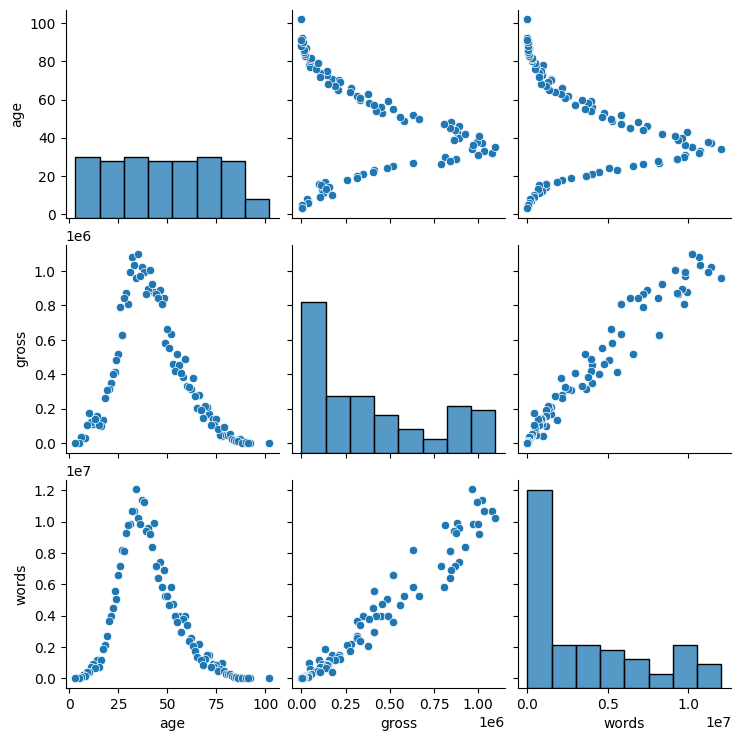

In [360]:
sns.pairplot(selected4[['age', 'gross', 'words']])
plt.show()